
# Thinkful Data Science Fundamentals: Capstone Data Analysis Report
-------------------------------------------------------------------------------------------------------------------------
## _United States Oil Pipeline Accidents, Jan 2010 - Dec 2016_
###### Source of data (gathered August 2018): [https://www.kaggle.com/usdot/pipeline-accidents](https://www.kaggle.com/usdot/pipeline-accidents)
###### Date:  August 10, 2018

-------------------------------------------------------------------------------------------------------------------------
# _Import modules and enable the display of plots in this notebook_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

-------------------------------------------------------------------------------------------------------------------------
# _Load the dataset into a DataFrame_

In [2]:
file = 'database.csv'
accidents = pd.read_csv(file)

-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  What is some _key information_ that can be learned quickly about the content of the dataset?

In [3]:
# How many (rows, columns) are in the dataset?
accidents.shape

(2795, 48)

In [4]:
# What are the column names and how many of them contain data?
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

-------------------------------------------------------------------------------------------------------------------------
# _Prepare the dataset for analysis_

In [5]:
# Make a copy of the initial DataFrame
acc_copy = accidents.copy()

# Add a 'Count' column to the copy
acc_copy['Count'] = 1

# Add a 'Month' column to the copy
acc_copy['Month'] = acc_copy['Accident Date/Time'].apply(lambda dt: int(dt[:dt.find('/')]))

# Add an 'Hour' column to the copy
def get_hour(dt):
    hour = int(dt[dt.find(' ')+1:dt.find(':')])
    if dt.strip().endswith('AM') and hour == 12:
        hour = 0
    elif dt.strip().endswith('PM') and hour != 12:
        hour += 12
    return hour
    
acc_copy['Hour'] = acc_copy['Accident Date/Time'].apply(get_hour)

# The dataset includes accidents from Jan 2010 through Jan 2017.
# Since data exists for full years 2010-2016 but only exists for 
# a small portion of the year 2017 (two records for Jan 2017), 
# I excluded those two records.  This should prevent any incorrect 
# conclusions from being made about 2017 relative to other years.
acc_2010_2016 = acc_copy[acc_copy['Accident Year'] < 2017]

-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  Which accidents caused the _most fatalities and/or injuries_?

In [6]:
injuries_fatalities = acc_2010_2016[(acc_2010_2016['All Injuries'] > 0) | 
                        (acc_2010_2016['All Fatalities'] > 0)].fillna(0)
injuries_fatalities[['Operator ID', 'Operator Name', 'Pipeline/Facility Name', 
                     'Pipeline Type', 'Liquid Type', 'Liquid Ignition', 
                     'Liquid Explosion', 'Pipeline Shutdown',
                     'All Injuries', 'All Fatalities', 'All Costs']].sort_values(by=['All Fatalities', 'All Injuries'], ascending=[False, False])

,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Type,Liquid Type,Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Injuries,All Fatalities,All Costs
2730,2552,COLONIAL PIPELINE CO,LINE 01,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",YES,NO,YES,4.0,2.0,0
758,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 64,ABOVEGROUND,CRUDE OIL,YES,NO,YES,3.0,2.0,2836777
176,3445,DIXIE PIPELINE,DIXIE PIPELINE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",YES,YES,YES,1.0,1.0,524275
392,31618,ENTERPRISE PRODUCTS OPERATING LLC,ENTERPRISE WEST STORAGE FACILITY,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",YES,YES,YES,1.0,1.0,0
856,14194,"OILTANKING, HOUSTON LP",OILTANKING HOUSTON,ABOVEGROUND,CRUDE OIL,NO,NO,NO,1.0,1.0,0
2717,12105,"MAGELLAN AMMONIA PIPELINE, L.P.",VALLEY TO WHITING ANHYDROUS AMMONIA LINE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",NO,NO,YES,1.0,1.0,2755115
1163,31556,CHEVRON MIDSTREAM PIPELINES LLC,VENICE TO PARADIS NGL PIPELINE SYSTEM (VP-01),UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",YES,NO,YES,0.0,1.0,10262149
2145,26112,VALERO REFINING-TEXAS L.P.,VALERO-SHELL TIE-IN,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",NO,NO,YES,0.0,1.0,776753
1338,4906,EXXONMOBIL PIPELINE CO,TEXOMA TANKS 1010 COX DAIRY ROAD,UNDERGROUND,CRUDE OIL,YES,NO,NO,3.0,0.0,4850
1385,30829,ENTERPRISE CRUDE PIPELINE LLC,JONES CREEK STATION,ABOVEGROUND,CRUDE OIL,YES,NO,NO,2.0,0.0,5000


### [Colonial Pipeline Co - Line 01:  Accident history leading up to and including the October 2016 disaster](https://medium.com/planet-stories/the-anatomy-of-a-pipeline-accident-the-colonial-pipeline-spill-d30bb2a5941d)

In [7]:
colonial_line_01 = acc_2010_2016[acc_2010_2016['Pipeline/Facility Name'] == 'LINE 01']

# Accident History/Details for Colonial Pipeline Co. - Line 01
colonial_line_01[['Accident Date/Time', 'Operator Name', 
                  'Pipeline/Facility Name', 'Accident Latitude', 
                  'Accident Longitude', 'Cause Category', 
                  'Cause Subcategory', 'All Injuries', 
                  'All Fatalities', 'All Costs']]

,Accident Date/Time,Operator Name,Pipeline/Facility Name,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,All Injuries,All Fatalities,All Costs
2459,2/29/2016 2:00 PM,COLONIAL PIPELINE CO,LINE 01,33.975062,-83.898977,MATERIAL/WELD/EQUIP FAILURE,"CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED",NaN,NaN,847353
2500,4/15/2016 6:10 PM,COLONIAL PIPELINE CO,LINE 01,33.659400,-85.464900,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,NaN,NaN,947200
2675,9/9/2016 11:10 AM,COLONIAL PIPELINE CO,LINE 01,33.236374,-86.916634,ALL OTHER CAUSES,UNKNOWN,NaN,NaN,66234072
2730,10/31/2016 2:51 PM,COLONIAL PIPELINE CO,LINE 01,33.204379,-87.006137,ALL OTHER CAUSES,UNKNOWN,4.0,2.0,0


###### A common motto in industry is "Safety First" and the accident above is [very tragic](https://www.cbs42.com/news/local/2nd-colonial-pipeline-explosion-victim-has-died-osha-says/868185307).  There (fortunately) are not enough safety-related incidents (injuries/fatalities) in this dataset to warrant a detailed statistical exploration in those categories.  However, we should look for warning signs in historical data that may indicate heightened risk parameters, which might help prevent future loss of life, injuries, and environmental damage.  

###### Numerical and statistical analysis will focus on some of the other columns in the dataset.
-------------------------------------------------------------------------------------------------------------------------

# _Limitations of the analyzed data_

### The dataset used in this analysis only includes information regarding "pipeline accidents" for the United States, from 2010-2016.  This means that several noteworthy oil-related accidents, such as the Exxon Valdez "tanker" spill in 1989 and the Deepwater Horizon "offshore platform" accident from 2010, are not included in the dataset.

### Only seven years of U.S. pipeline accident data are included in this analysis.  If the dataset was larger and included data for more than one decade, it might be necessary to adjust the values in the cost columns for inflation.  No inflation adjustment of pipeline accident costs will be performed in the following numerical & statistical analyses.
-------------------------------------------------------------------------------------------------------------------------

# _Exploring the data for context & meaning_

### QUESTION:  Which pipeline operators incurred the _greatest_ accident-related costs from 2010-2016, and _how many_ accidents did they experience over that timeframe?

In [8]:
operator_acc_df = acc_2010_2016[['Operator ID', 'Operator Name', 'All Costs', 'Count']]
operator_acc_obj = operator_acc_df.groupby(['Operator ID', 'Operator Name'])
operator_acc = operator_acc_obj.sum().sort_values(by='All Costs', ascending=False)

# Top 15 Pipeline Operators with the Highest Incurred Costs for Pipeline Accidents 
# from 2010-2016 
# ('All Costs' includes totals from all associated Operator Pipeline/Facilites)
operator_acc.head(15)

,,All Costs,Count
Operator ID,Operator Name,,
11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",918465669,71
300,"PLAINS PIPELINE, L.P.",169708804,156
4906,EXXONMOBIL PIPELINE CO,148971955,47
2552,COLONIAL PIPELINE CO,108248631,136
2731,CHEVRON PIPE LINE CO,102672298,34
12628,MOBIL PIPE LINE COMPANY,91678045,7
32147,MARATHON PIPE LINE LLC,70434154,86
22430,WEST SHORE PIPELINE CO,50307083,13
26149,ALYESKA PIPELINE SERVICE CO,48836519,8


-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  Did any Operator Pipelines/Facilities experience _more than one (1)_ accident from 2010-2016?

In [9]:
op_pipe_fac_acc_df = acc_2010_2016[['Operator ID', 'Operator Name', 
                                    'Pipeline/Facility Name', 'Pipeline Type', 
                                    'Liquid Type', 'Cause Category', 
                                    'Cause Subcategory', 'All Costs', 'Count']]
op_pipe_fac_acc_obj = op_pipe_fac_acc_df.groupby(['Operator ID', 'Operator Name', 
                                                  'Pipeline/Facility Name', 'Pipeline Type'])
op_pipe_fac_acc = op_pipe_fac_acc_obj.sum()
op_pipe_fac_acc_mult = op_pipe_fac_acc[op_pipe_fac_acc['Count'] > 1]

###### Pipelines/Facilities with more than one (1) accident sorted by 'Count'

In [10]:
# Top 15 Pipeline/Facilities with the Most Accidents from 2010-2016
# The 'Count' column may reveal something about the age and/or 
# quality control practices of the associated pipeline/facility.
op_pipe_fac_acc_mult.sort_values(by='Count', ascending=False).head(15)

,,,,All Costs,Count
Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Type,,
1845,"BUCKEYE PARTNERS, LP",LINDEN STATION,ABOVEGROUND,209462,11
18718,SUNOCO PIPELINE L.P.,CORSICANA STATION,ABOVEGROUND,149292,10
32537,WYOMING PIPELINE COMPANY,WYOMING PIPELINE COMPANY,ABOVEGROUND,15210,9
26041,"KINDER MORGAN LIQUID TERMINALS, LLC",CARTERET TERMINAL,ABOVEGROUND,1532686,8
11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,UNDERGROUND,312081,6
32537,WYOMING PIPELINE COMPANY,WYOMING PIPELINE COMPANY,UNDERGROUND,347008,6
18718,SUNOCO PIPELINE L.P.,CORSICANA STATION,UNDERGROUND,514105,6
26041,"KINDER MORGAN LIQUID TERMINALS, LLC",PASADENA TERMINAL,ABOVEGROUND,296500,5
30829,ENTERPRISE CRUDE PIPELINE LLC,JONES CREEK STATION,ABOVEGROUND,224910,5


###### Pipelines/Facilities with more than one (1) accident sorted by 'All Costs'

In [11]:
# Top 15 Pipeline/Facilities with the Most COSTLY Accidents from 2010-2016
# The 'Count' column may reveal something about the age and/or 
# quality control practices of the associated operator pipeline/facility.
op_pipe_fac_acc_mult.sort_values(by='All Costs', ascending=False).head(15)

,,,,All Costs,Count
Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Type,,
11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 6B,UNDERGROUND,840551118,2
2552,COLONIAL PIPELINE CO,LINE 01,UNDERGROUND,68028625,4
11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 6A,UNDERGROUND,47723566,2
31554,CHEVRON PETROCHEMICAL PIPELINE LLC,EVANGELINE ETHYLENE PIPELINE SYSTEM,UNDERGROUND,26200911,3
31570,TESORO HIGH PLAINS PIPELINE COMPANY LLC,TESORO HIGH PLAINS PIPELINE,UNDERGROUND,17059390,2
31947,ENBRIDGE PIPELINES (OZARK) L.L.C.,CUSHING TERMINAL,UNDERGROUND,13898274,2
30959,THE DOW CHEMICAL COMPANY,THE DOW CHEMICAL COMPANY,UNDERGROUND,6449980,2
32011,"HOLLY ENERGY PARTNERS - OPERATING, L.P.","10"" FINTEX",UNDERGROUND,4106750,3
18718,SUNOCO PIPELINE L.P.,"COLMESNEIL TO CHESTER 8""",UNDERGROUND,3941740,3


###### The above findings will be explored in more detail later in this analysis.

-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  What is the _total number_ of pipeline accidents:  by year, by month, & by hour?

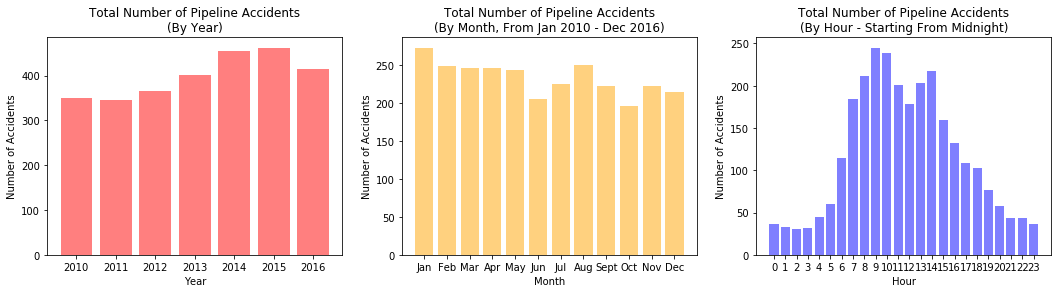

In [12]:
# Total accidents by year
# Have accident totals increased/decreased over the years?
acc_by_year = acc_2010_2016[['Accident Year', 'Count']].groupby('Accident Year').sum()

# Total accidents by month (over multiple years)
# Might season be a contributing factor to pipeline accidents?
acc_by_month = acc_2010_2016[['Month', 'Count']].groupby('Month').sum()

# Total accidents by the hour (over multiple years)
# Might time-of-day be a contributing factor to pipeline accidents?
acc_by_hour = acc_2010_2016[['Hour', 'Count']].groupby('Hour').sum()

# Plot the variables above
fig, axes = plt.subplots(1, 3, figsize=(18,4))

opacity = 0.5

# By Year
axes[0].bar(acc_by_year.index, acc_by_year['Count'], alpha=opacity, color='red')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Total Number of Pipeline Accidents\n(By Year)')

# By Month
axes[1].bar(acc_by_month.index, acc_by_month['Count'], alpha=opacity, color='orange')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_title('Total Number of Pipeline Accidents\n(By Month, From Jan 2010 - Dec 2016)')
axes[1].set_xticks(acc_by_month.index)
axes[1].set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'))

# By Hour
axes[2].bar(acc_by_hour.index, acc_by_hour['Count'], alpha=opacity, color='blue')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Number of Accidents')
axes[2].set_title('Total Number of Pipeline Accidents\n(By Hour - Starting From Midnight)')
axes[2].set_xticks(acc_by_hour.index)
axes[2].set_xticklabels(range(24))

plt.show()

###### It is unknown as to whether the bell-shaped hourly chart (on the right) above may indicate:
   - ###### if pipeline accidents are more likely to happen during the daylight hours when more people are working, AND/OR 
   - ###### if that is when people are more apt to notice that an accident has occurred and report it, assuming control systems have not logged the accidents automatically, AND/OR
   - ###### something else

-------------------------------------------------------------------------------------------------------------------------
### QUESTION: What is the distribution of _total cost_ statistics for U.S. pipeline accidents, 2010-2016?

In [13]:
# Total cost statistics for all U.S. pipeline accidents, 2010-2016
all_pipeline_acc_2010_2016 = acc_2010_2016['All Costs']
all_pipeline_acc_2010_2016.describe()

count    2.793000e+03
mean     8.345992e+05
std      1.658422e+07
min      0.000000e+00
25%      5.039000e+03
50%      2.305200e+04
75%      1.173950e+05
max      8.405261e+08
Name: All Costs, dtype: float64

###### The statistics above show that data (for 2,793 pipeline accidents) in the 'All Costs' column ranges from USD 0 to USD ~840,526,100.  The average (mean) cost per accident (between 2010-2016) was USD 834,599 but has a standard deviation of USD ~16,584,220!  Since 75% of the data points are less than USD 117,395 and 50% are less than USD 23,052 (the median), the average is weighted higher due to smaller numbers of much larger data points.  This indicates that the total cost data for all pipeline accidents in the dataset is not normally distributed.  This can be seen below where only pipeline accidents with total costs less than USD 1million are included in the histogram.

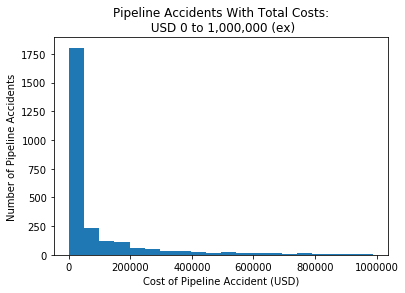

In [14]:
plt.hist(acc_2010_2016[acc_2010_2016['All Costs'] < 1000000]['All Costs'], bins=20)
plt.xlabel('Cost of Pipeline Accident (USD)')
plt.ylabel('Number of Pipeline Accidents')
plt.title('Pipeline Accidents With Total Costs:\n USD 0 to 1,000,000 (ex)')

plt.show()

###### However, there are many accidents in the dataset with total costs greater than USD 1million.  Therefore, a better way to view the frequency distribution of this data may be to break it up into different cost tiers.

###### Create DataFrames for different cost tiers

In [15]:
# Accidents where total costs were less than $10,000
cost_0_10k = acc_2010_2016[acc_2010_2016['All Costs'] < 10000]

# Accidents where total costs ranged from $10,000 to $100,000
cost_10k_100k = acc_2010_2016[(acc_2010_2016['All Costs'] >= 10000) & 
                           (acc_2010_2016['All Costs'] < 100000)]

# Accidents where total costs ranged from $100,000 to $1,000,000
cost_100k_1m = acc_2010_2016[(acc_2010_2016['All Costs'] >= 100000) & 
                          (acc_2010_2016['All Costs'] < 1000000)]

# Accidents where total costs ranged from $1,000,000 to $10,000,000
cost_1m_10m = acc_2010_2016[(acc_2010_2016['All Costs'] >= 1000000) & 
                         (acc_2010_2016['All Costs'] < 10000000)]

# Accidents where total costs ranged from $10,000,000 to $100,000,000
cost_10m_100m = acc_2010_2016[(acc_2010_2016['All Costs'] >= 10000000) & 
                           (acc_2010_2016['All Costs'] < 100000000)]

# Accidents where total costs ranged from $100,000,000 to $1,000,000,000
cost_100m_1b = acc_2010_2016[(acc_2010_2016['All Costs'] >= 100000000) & 
                          (acc_2010_2016['All Costs'] < 1000000000)]

###### Display frequency distributions for pipeline accidents where total costs fell within each of the above cost ranges

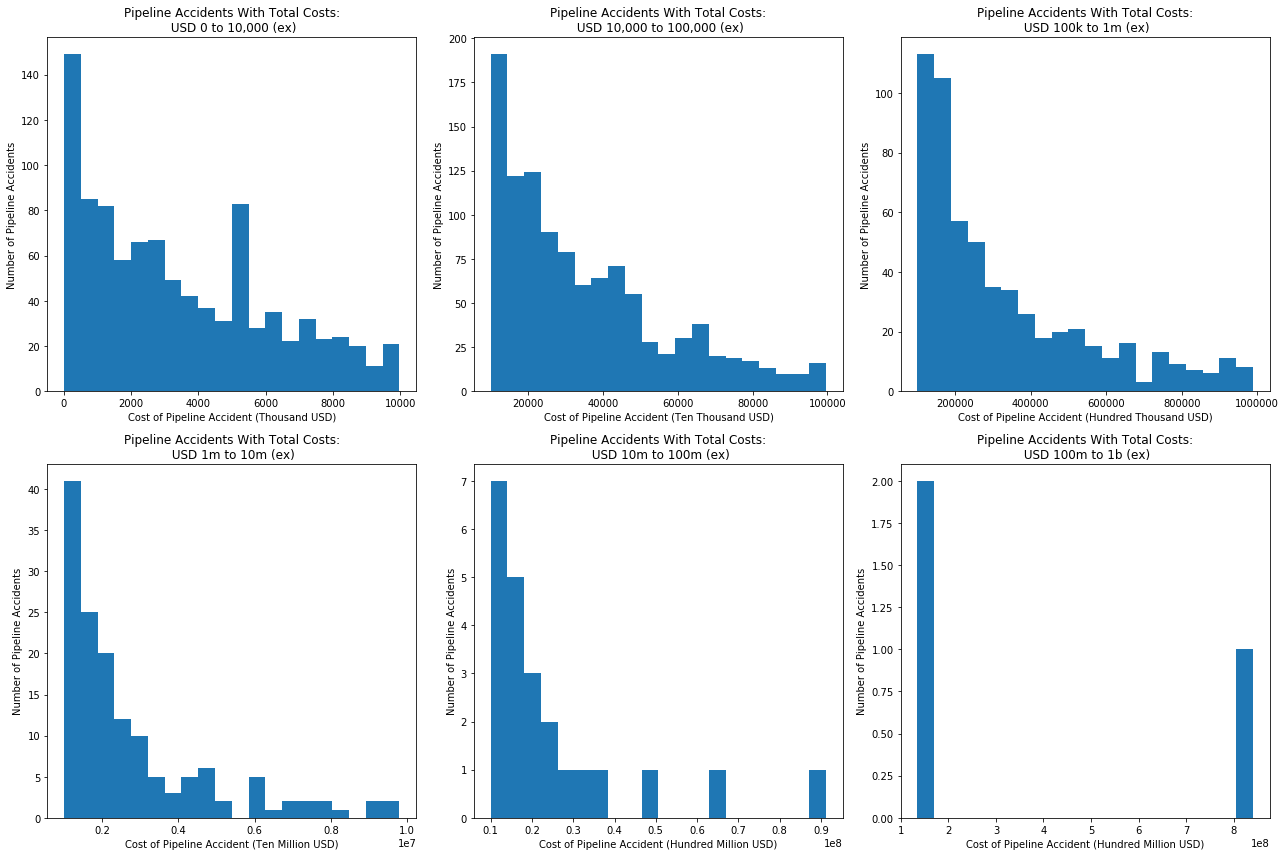

In [16]:
# Plot the variables above
fig, axes = plt.subplots(2, 3, figsize=(18,12))

# [$0, $10,000)
axes[0,0].hist(cost_0_10k['All Costs'], bins=20)
axes[0,0].set_xlabel('Cost of Pipeline Accident (Thousand USD)')
axes[0,0].set_ylabel('Number of Pipeline Accidents')
axes[0,0].set_title('Pipeline Accidents With Total Costs:\n USD 0 to 10,000 (ex)')

# [$10,000, $100,000)
axes[0,1].hist(cost_10k_100k['All Costs'], bins=20)
axes[0,1].set_xlabel('Cost of Pipeline Accident (Ten Thousand USD)')
axes[0,1].set_ylabel('Number of Pipeline Accidents')
axes[0,1].set_title('Pipeline Accidents With Total Costs:\n USD 10,000 to 100,000 (ex)')

# [$100,000, 1,000,000)
axes[0,2].hist(cost_100k_1m['All Costs'], bins=20)
axes[0,2].set_xlabel('Cost of Pipeline Accident (Hundred Thousand USD)')
axes[0,2].set_ylabel('Number of Pipeline Accidents')
axes[0,2].set_title('Pipeline Accidents With Total Costs:\n USD 100k to 1m (ex)')

# [$1,000,000, $10,000,000)
axes[1,0].hist(cost_1m_10m['All Costs'], bins=20)
axes[1,0].set_xlabel('Cost of Pipeline Accident (Ten Million USD)')
axes[1,0].set_ylabel('Number of Pipeline Accidents')
axes[1,0].set_title('Pipeline Accidents With Total Costs:\n USD 1m to 10m (ex)')

# [$10,000,000, $100,000,000)
axes[1,1].hist(cost_10m_100m['All Costs'], bins=20)
axes[1,1].set_xlabel('Cost of Pipeline Accident (Hundred Million USD)')
axes[1,1].set_ylabel('Number of Pipeline Accidents')
axes[1,1].set_title('Pipeline Accidents With Total Costs:\n USD 10m to 100m (ex)')

# [$100,000,000, $1,000,000,000)
axes[1,2].hist(cost_100m_1b['All Costs'], bins=20)
axes[1,2].set_xlabel('Cost of Pipeline Accident (Hundred Million USD)')
axes[1,2].set_ylabel('Number of Pipeline Accidents')
axes[1,2].set_title('Pipeline Accidents With Total Costs:\n USD 100m to 1b (ex)')

plt.tight_layout()
plt.show()

###### The frequency distribution of pipeline accident costs appears similarly shaped at each cost tier/range, with the exception of the plot on the bottom-right (as only three accidents totaling between USD 100m - 1b were recorded).

-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  What are the _primary causes_ of pipeline accidents?

In [17]:
acc_2010_2016['Cause Category'].unique()

array(['INCORRECT OPERATION', 'MATERIAL/WELD/EQUIP FAILURE',
       'NATURAL FORCE DAMAGE', 'EXCAVATION DAMAGE', 'ALL OTHER CAUSES',
       'CORROSION', 'OTHER OUTSIDE FORCE DAMAGE'], dtype=object)

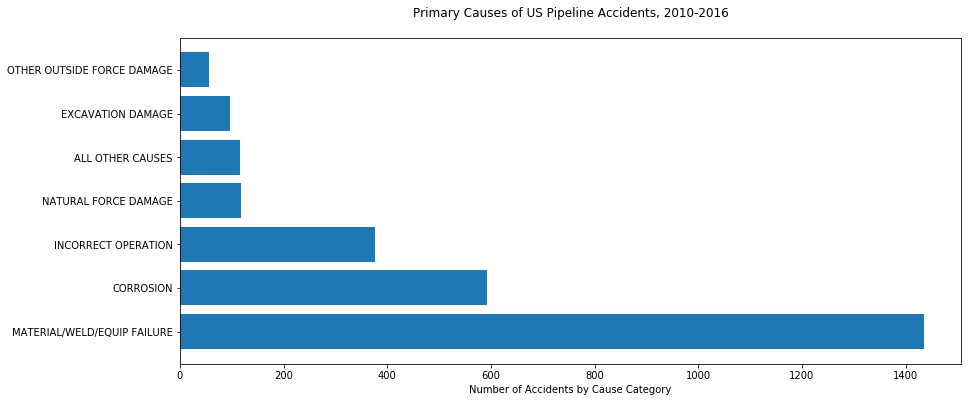

In [18]:
causes = acc_2010_2016['Cause Category'].value_counts()

# Make a horizontal bar chart
fig, axes = plt.subplots(figsize=(14,6))

axes.barh(causes.index, causes.values)
axes.set_yticks(np.arange(len(causes.index))) 
axes.set_yticklabels(causes.index)
axes.set_xlabel('Number of Accidents by Cause Category')
axes.set_title('Primary Causes of US Pipeline Accidents, 2010-2016\n')

plt.show()

-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  What are the most financially costly _types_ of pipeline accidents, grouped by:  Pipeline Type, Liquid Type, & Cause Category?

In [19]:
onshore_costs = acc_2010_2016[['Pipeline Type','Liquid Type',
                               'Cause Category','Count','All Costs']]
onshore_costs_obj = onshore_costs.groupby(['Pipeline Type',
                                           'Liquid Type','Cause Category'])
grouped_costs = onshore_costs_obj.sum().sort_values(by='All Costs', 
                                                    ascending=False)
grouped_costs['Avg Cost/Accident'] = grouped_costs['All Costs'] / grouped_costs['Count']

# Top 15 Most Financially Costly Types of Pipeline Accidents for 2010-2016
grouped_costs.head(15)

Count  \
Pipeline Type Liquid Type                                        Cause Category                       
UNDERGROUND   CRUDE OIL                                          MATERIAL/WELD/EQUIP FAILURE     88   
                                                                 CORROSION                      300   
                                                                 NATURAL FORCE DAMAGE            17   
                                                                 OTHER OUTSIDE FORCE DAMAGE      10   
              REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID MATERIAL/WELD/EQUIP FAILURE    133   
                                                                 CORROSION                       89   
                                                                 ALL OTHER CAUSES                 9   
              HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS         MATERIAL/WELD/EQUIP FAILURE     94   
              REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID EXCAVATION DAMAGE               31   
              CRUDE OIL                                          EXCAVATION DAMAGE               41   
ABOVEGROUND   CRUDE OIL                                          MATERIAL/WELD/EQUIP FAILURE    435   
                                                                 INCORRECT OPERATION            141   
TANK          CRUDE OIL                                          INCORRECT OPERATION             24   
UNDERGROUND   REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID OTHER OUTSIDE FORCE DAMAGE      14   
ABOVEGROUND   REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID MATERIAL/WELD/EQUIP FAILURE    322   

                                                                                               All Costs  \
Pipeline Type Liquid Type                                        Cause Category                            
UNDERGROUND   CRUDE OIL                                          MATERIAL/WELD/EQUIP FAILURE  1006079402   
                                                                 CORROSION                     274136508   
                                                                 NATURAL FORCE DAMAGE          169050668   
                                                                 OTHER OUTSIDE FORCE DAMAGE    110592879   
              REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID MATERIAL/WELD/EQUIP FAILURE   106143275   
                                                                 CORROSION                      90285152   
                                                                 ALL OTHER CAUSES               83617578   
              HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS         MATERIAL/WELD/EQUIP FAILURE    51048870   
              REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID EXCAVATION DAMAGE              45882142   
              CRUDE OIL                                          EXCAVATION DAMAGE              37340762   
ABOVEGROUND   CRUDE OIL                                          MATERIAL/WELD/EQUIP FAILURE    34989133   
                                                                 INCORRECT OPERATION            31841967   
TANK          CRUDE OIL                                          INCORRECT OPERATION            30790660   
UNDERGROUND   REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID OTHER OUTSIDE FORCE DAMAGE     23183946   
ABOVEGROUND   REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID MATERIAL/WELD/EQUIP FAILURE    16352962   

                                                                                              Avg Cost/Accident  
Pipeline Type Liquid Type                                        Cause Category                                  
UNDERGROUND   CRUDE OIL                                          MATERIAL/WELD/EQUIP FAILURE       1.143272e+07  
                                                                 CORROSION                         9.137884e+05  
                                                 

###### When grouped by 'Pipeline Type,' 'Liquid Type,' and 'Cause Category,' accidents that are attributed to some variant of UNDERGROUND piping can be seen to comprise the Top 10 slots for most financially costly types of pipeline accidents for the timeframe 2010-2016.

###### 'MATERIAL/WELD/EQUIP FAILURE' and 'CORROSION' appear as the two (2) most costly causes of pipeline accidents.

-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  How have the numbers of these two particular _causes_ of pipeline accidents changed over time?

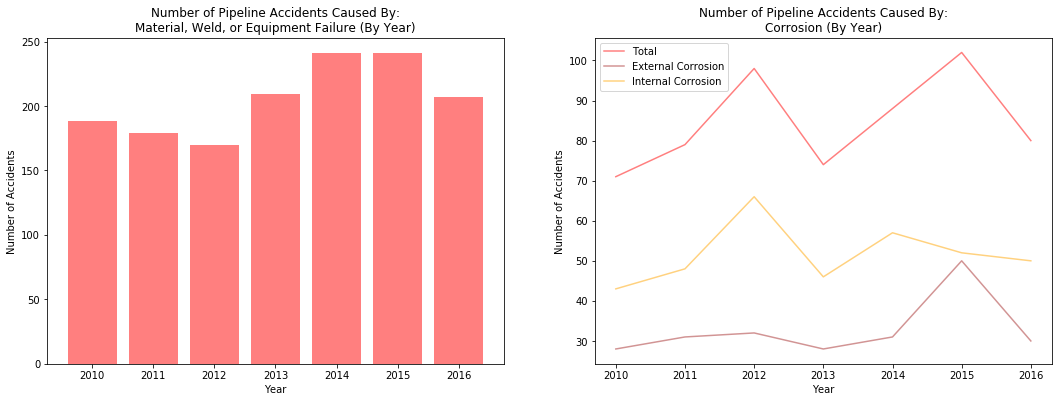

In [20]:
cause_by_year = acc_2010_2016[['Accident Year', 'Cause Category', 
                               'Cause Subcategory', 'Count']]

# All Accidents Caused By Material / Weld / Equipment Failure
mwe_failure = cause_by_year[cause_by_year['Cause Category'] == 'MATERIAL/WELD/EQUIP FAILURE']
mwe_failure_by_year = mwe_failure.groupby('Accident Year').sum()

# All Accidents Caused By Corrosion
corr = cause_by_year[cause_by_year['Cause Category'] == 'CORROSION']
corr_by_year = corr.groupby('Accident Year').sum()

# Accidents Caused By External Corrosion
ext_corr = cause_by_year[(cause_by_year['Cause Category'] == 'CORROSION') & 
                                 (cause_by_year['Cause Subcategory'] == 'EXTERNAL')]
ext_corr_by_year = ext_corr.groupby('Accident Year').sum()

# Accidents Caused By Internal Corrosion
int_corr = cause_by_year[(cause_by_year['Cause Category'] == 'CORROSION') & 
                                 (cause_by_year['Cause Subcategory'] == 'INTERNAL')]
int_corr_by_year = int_corr.groupby('Accident Year').sum()

# Plot the variables above
fig, axes = plt.subplots(1, 2, figsize=(18,6))

opacity = 0.5

# Material / Weld / Equipment Failures By Year
axes[0].bar(mwe_failure_by_year.index, mwe_failure_by_year['Count'], 
            alpha=opacity, color='red')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Number of Pipeline Accidents Caused By:\n'
                  'Material, Weld, or Equipment Failure (By Year)')

# Corrosion By Year
axes[1].plot(corr_by_year.index, corr_by_year['Count'], 
             alpha=opacity, color='red', label='Total')
axes[1].plot(ext_corr_by_year.index, ext_corr_by_year['Count'], 
             alpha=opacity, color='brown', label='External Corrosion')
axes[1].plot(int_corr_by_year.index, int_corr_by_year['Count'], 
             alpha=opacity, color='orange', label='Internal Corrosion')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_title('Number of Pipeline Accidents Caused By:\n'
                  'Corrosion (By Year)')
axes[1].legend()

plt.show()

###### Although more annual data would be helpful, the 'Material, Weld, or Equipment Failure' plot on the left appears to trend upwards over time and is also similar in shape to the 'Total Number of Pipeline Accidents (By Year)' plot displayed previously.  The 'Total' line-graph in the 'Corrosion' plot on the right also appears to have an upward trend, characterized by higher lows and higher highs for the given time period.  It is likely attributed to some combination of aging infrastructure and/or better data collection over time.

###### Regarding corrosion, the National Association of Corrosion Engineers (NACE) states on its [website](http://impact.nace.org/economic-impact.aspx#):

> ASSESSMENT OF THE GLOBAL COST OF CORROSION

> The global cost of corrosion is estimated to be USD 2.5 trillion, which is equivalent to 3.4% of the global GDP (2013). By using available corrosion control practices, it is estimated that savings of between 15 and 35% of the cost of corrosion could be realized; i.e., between USD 375 and USD 875 billion annually on a global basis. These costs typically do not include individual safety or environmental consequences. Through near misses, incidents, forced shutdowns (outages), accidents, etc., several industries have come to realize that lack of corrosion management can be very costly and that, through proper corrosion management, significant cost savings can be achieved over the lifetime of an asset. To achieve the full extent of these savings, corrosion management and its integration into an organization’s management system must be accomplished by implementing a Corrosion Management System (CMS). 


-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  Did any operator pipelines/facilities experience _more than one (1)_ accident _due to the same causes_?

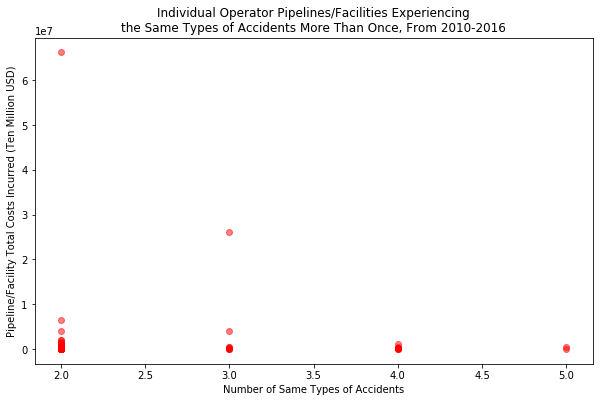

In [21]:
pipe_fac_acc_causes_obj = op_pipe_fac_acc_df.groupby(['Operator ID', 'Operator Name', 
                                                      'Pipeline/Facility Name', 
                                                      'Pipeline Type', 'Liquid Type', 
                                                      'Cause Category', 'Cause Subcategory'])
pipe_fac_acc_causes = pipe_fac_acc_causes_obj.sum()
pipe_fac_acc_same_causes = pipe_fac_acc_causes[pipe_fac_acc_causes['Count'] > 1]

# Make a scatter plot for Operator Pipelines/Facilities that have experienced 
# the same types of accidents more than once and the total costs incurred
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

opacity = 0.5

axes.scatter(pipe_fac_acc_same_causes['Count'], pipe_fac_acc_same_causes['All Costs'], 
            alpha=opacity, color='red')
axes.set_xlabel('Number of Same Types of Accidents')
axes.set_ylabel('Pipeline/Facility Total Costs Incurred (Ten Million USD)')
axes.set_title('Individual Operator Pipelines/Facilities Experiencing\nthe Same Types of Accidents More Than Once, From 2010-2016')

plt.show()

###### See the DataFrame below for details regarding the five (5) most costly data points in the scatter plot above.

In [22]:
pipe_fac_acc_same_causes.sort_values(by='All Costs', ascending=False).head(5)

,,,,,,,All Costs,Count
Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Type,Liquid Type,Cause Category,Cause Subcategory,,
2552,COLONIAL PIPELINE CO,LINE 01,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",ALL OTHER CAUSES,UNKNOWN,66234072,2
31554,CHEVRON PETROCHEMICAL PIPELINE LLC,EVANGELINE ETHYLENE PIPELINE SYSTEM,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,26200911,3
30959,THE DOW CHEMICAL COMPANY,THE DOW CHEMICAL COMPANY,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",CORROSION,INTERNAL,6449980,2
32011,"HOLLY ENERGY PARTNERS - OPERATING, L.P.","10"" FINTEX",UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,4066250,2
18718,SUNOCO PIPELINE L.P.,"COLMESNEIL TO CHESTER 8""",UNDERGROUND,CRUDE OIL,CORROSION,INTERNAL,3941740,3


-------------------------------------------------------------------------------------------------------------------------
### QUESTION:  How _confidently_ can it be stated that, in general, 'UNDERGROUND' pipeline accidents are more costly than 'ABOVEGROUND' pipeline accidents? 

In [23]:
pop_underground_acc_costs = acc_2010_2016[acc_2010_2016['Pipeline Type'] == 'UNDERGROUND']['All Costs']
pop_aboveground_acc_costs = acc_2010_2016[acc_2010_2016['Pipeline Type'] == 'ABOVEGROUND']['All Costs']

t_stats = []
p_vals = []
for i in range(10000):
    
    # I decided to use sample sizes equal to 1/2 of the number of accidents for each Pipeline Type
    # Total underground accidents = 1474; total aboveground accidents = 984
    sample_underground_costs = np.random.choice(pop_underground_acc_costs, 492, replace=False)
    sample_aboveground_costs = np.random.choice(pop_aboveground_acc_costs, 737, replace=False)

    ttest = ttest_ind(sample_underground_costs, sample_aboveground_costs, equal_var=False)
    
    t_stats.append(ttest.statistic)
    p_vals.append(ttest.pvalue)

In [24]:
# After 10,000 iterations of sampling and averaging the p_values
avg_ttest_statistic = sum(t_stats) / len(t_stats)
avg_p_val = sum(p_vals) / len(p_vals)
print("Average t-statistic: ", avg_ttest_statistic)
print("Average p-value:     ", avg_p_val)

Average t-statistic:  2.564444770956169
Average p-value:      0.053206032420751184


###### Based on repeatedly sampling the dataset for the costs of accidents that happened 'UNDERGROUND' vs the costs of accidents that happened 'ABOVEGROUND,' comparing their sample statistics, and averaging the resulting t-statistic and p-value calculations, an average t-statistic of ~2.56 and an average p-value of ~0.05 are the results.  The t-statistic indicates that the sample means are separated by ~2.56 standard errors.  The p-value is close to 0.05, meaning that we can reject the hypothesis of both means being equal with 95% confidence.

-------------------------------------------------------------------------------------------------------------------------
### _FURTHER RESEARCH - EVALUATING RISK FOR INDIVIDUAL PIPELINES/FACILITIES & OPERATORS_

#### Based on all of the above findings, it would be interesting to explore the data further to determine:
  - ##### Do certain types of accidents occur more/less often depending on season?
  - ##### How concentrated (geographically and over time) are recurring types of accidents for the same pipelines/facilities?

  - ##### Which operators have _more than one_ pipeline/facility that have experienced the same types of accidents _more than once_?
    - #### This may reveal something about:  
        - #### The age of operator assets, and/or 
        - #### The rigor of QA/QC practices put in place during construction and/or maintenance

#### It's possible that such research could also be applied to determine the likelihood (and locations at highest risk) of future accidents for those pipelines/facilities and others.